In [1]:
from tqdm import tqdm, trange
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import spacy 
import string
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_sm')
nlp.disable_pipes('tagger', 'ner')

[('tagger', <spacy.pipeline.Tagger at 0x1ff47a50b70>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x1ff47ba5a40>)]

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [7]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [8]:
len(train)

159571

In [9]:
train_bad = train[(train['toxic']==1) | (train['severe_toxic']==1) | (train['obscene']==1) | (train['threat']==1) | (train['insult']==1) | (train['identity_hate']==1)]

In [10]:
len(train_bad)

16225

In [11]:
train_good = train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)]

In [12]:
len(train_good)+len(train_bad) == len(train)

True

In [13]:
train_good = train_good.sample(len(train_bad))

In [14]:
len(train_good)

16225

In [15]:
train_good['bad'] = 0

In [16]:
train_bad['bad'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
train = train_good.append(train_bad)

In [18]:
train = train.sample(frac=1)

In [19]:
len(train)

32450

In [21]:
train['bad'].sum()

16225

In [22]:
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [23]:
train[labels].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [24]:
train['comment_length'] = [len(comment)/5000 for comment in train['comment_text']]

In [25]:
max(train['comment_length'])

1.0

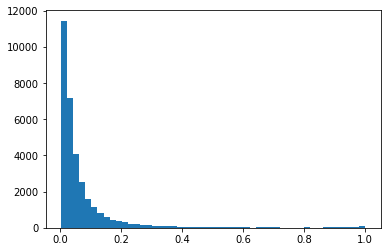

In [26]:
plt.hist(train['comment_length'],50)
plt.show()

In [27]:
def caps_rate(line):
    return sum([char.isupper() for char in line])/len(line)

In [28]:
train['caps_rate'] = [caps_rate(line) for line in train['comment_text']]

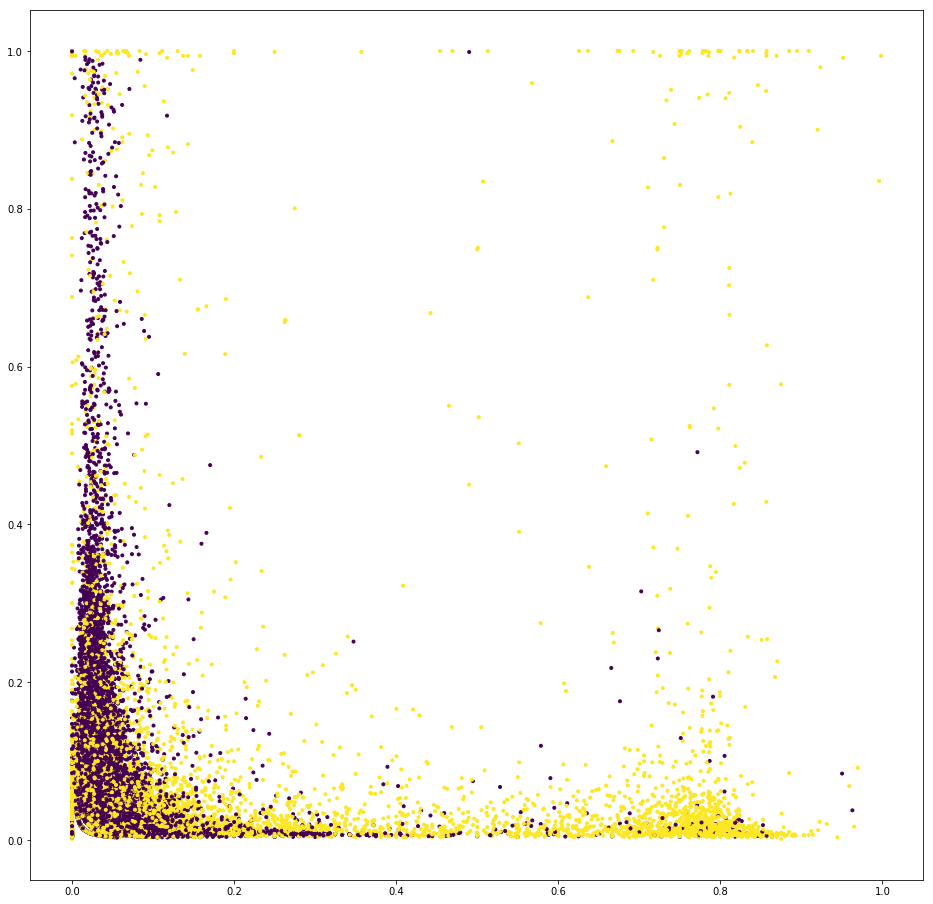

In [31]:
plt.figure(figsize=(16,16))
plt.scatter(train['caps_rate'],train['comment_length'],marker='.',c=train['toxic'])

In [32]:
bad_non_toxic = train[(train['toxic']==0) & ((train['severe_toxic']==1) | (train['obscene']==1) | (train['threat']==1) | (train['insult']==1) | (train['identity_hate']==1))]

In [33]:
len(bad_non_toxic)

931

In [34]:
bad_non_toxic

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,bad,comment_length,caps_rate
12329,20b08eded196907c,"Interesting theory, detective. But who can say...",0,0,1,0,1,0,1,0.1394,0.027260
108992,46c1f577e2208707,"(Damn it, I forgot to log in. -Brab)",0,0,1,0,0,0,1,0.0072,0.083333
103689,2ac683d37ad7e9d8,Your paranoid comments on my talk page==\n\nGo...,0,0,0,0,1,0,1,0.3378,0.026643
85505,e4b3e39b533164e5,"Hello \n\nHello, I have just recieved a warnin...",0,0,1,0,1,0,1,0.0230,0.034783
126442,a450c4d528908c36,Fine Arse.\n\nFoul mouth.\n\nWhat more do you ...,0,0,0,0,1,0,1,0.0094,0.085106
145577,1eeb5f133c1a932b,"""\n[[™]]whoever is the next person to write on...",0,0,0,0,1,0,1,0.0436,0.004587
134792,d0ef70fdb1a99e56,i hope they aren't breaking up for good becaus...,0,0,1,0,0,0,1,0.0190,0.000000
99205,12a8bb9ac50c72ee,"""\nI'd say Zivo Blato is not heavy metal but h...",0,0,1,0,0,0,1,0.0554,0.039711
115343,68cdd8ccddaa15a4,"You translated much more clumsy, dude.\nI just...",0,0,0,0,1,0,1,0.0200,0.040000
85629,e506297978756c04,Taylor Swift Album \n\nTodelete the names ESHE...,0,0,1,0,1,0,1,0.9888,0.084345


In [35]:
def alpha_rate(line):
    return sum([char.isalpha() for char in line])/len(line)

In [36]:
train['alpha_rate'] = [alpha_rate(comment) for comment in train['comment_text']]

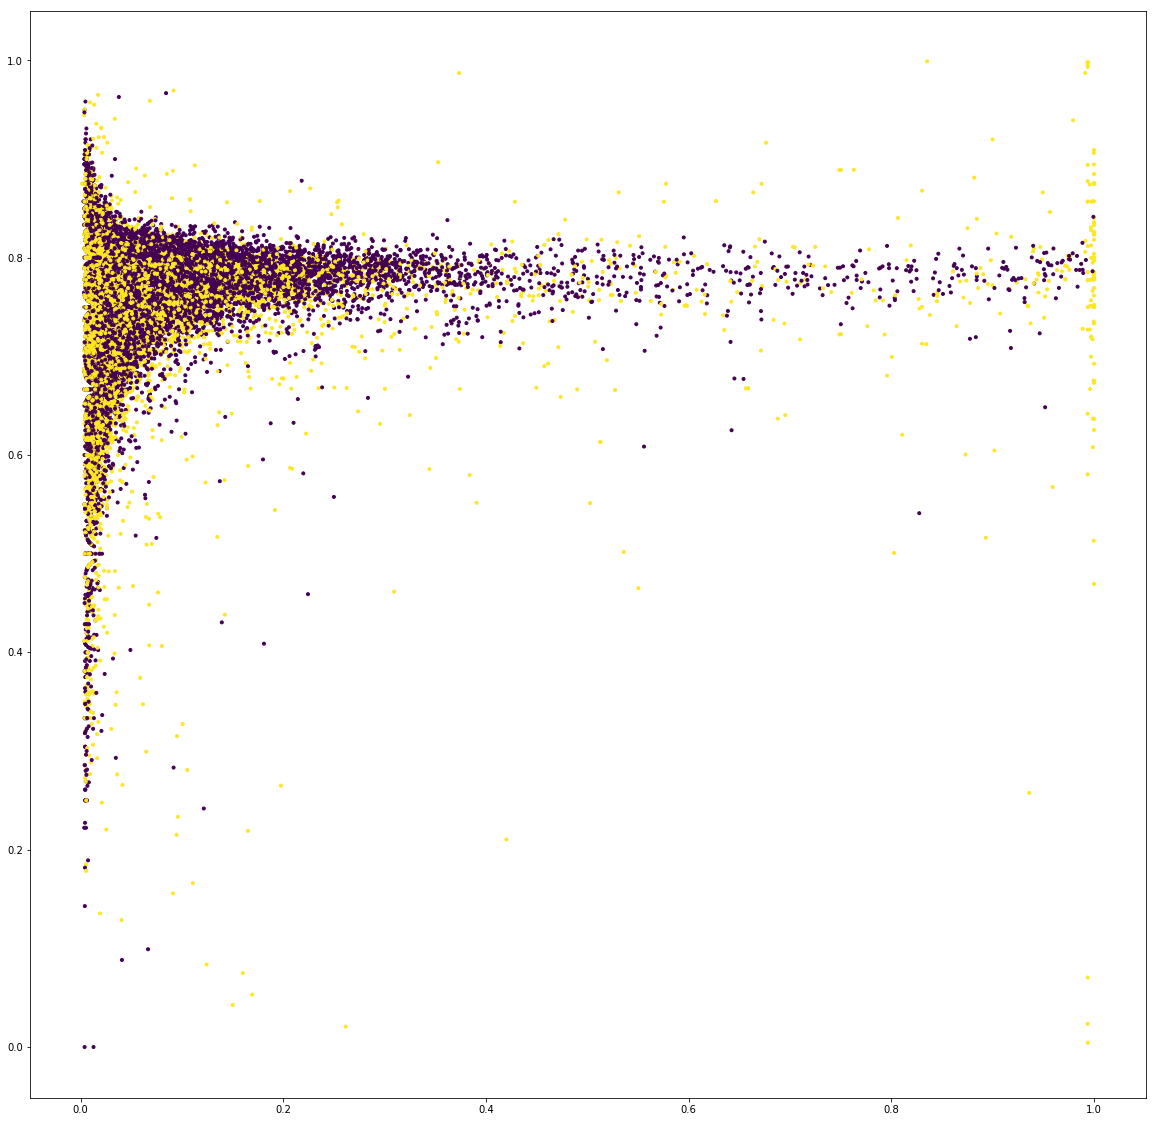

In [38]:
plt.figure(figsize=(20,20))
plt.scatter(train['comment_length'],train['alpha_rate'],marker='.',c=train['toxic'])

In [39]:
def number_of_words(line):
    return len(line.split())#len(nlp(line))

In [41]:
train['number_of_words'] = [number_of_words(comment) for comment in tqdm(train['comment_text'])]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32450/32450 [00:00<00:00, 193922.89it/s]


In [42]:
def exlamation_rate(line):
    return sum([char=='!' for char in line])/len(line)

In [43]:
train['exlamation_rate'] = [exlamation_rate(comment) for comment in train['comment_text']]

In [44]:
featues = ['comment_length', 'caps_rate', 'alpha_rate','number_of_words', 'exlamation_rate']

In [45]:
train[featues]

,comment_length,caps_rate,alpha_rate,number_of_words,exlamation_rate
119966,0.0554,0.021661,0.779783,49,0.000000
12329,0.1394,0.027260,0.773314,112,0.001435
2005,0.2472,0.028317,0.767799,219,0.000000
57762,0.1382,0.034732,0.798842,109,0.002894
41467,0.0858,0.009324,0.759907,75,0.000000
93937,0.1962,0.345566,0.671764,151,0.060143
148081,0.0116,0.000000,0.793103,11,0.000000
140697,0.0472,0.029661,0.694915,39,0.000000
86758,0.0138,0.000000,0.811594,11,0.000000
127286,0.1502,0.057257,0.743009,123,0.000000


In [46]:
from sklearn.decomposition import PCA

In [47]:
vis = PCA(n_components=2).fit_transform(train[featues])

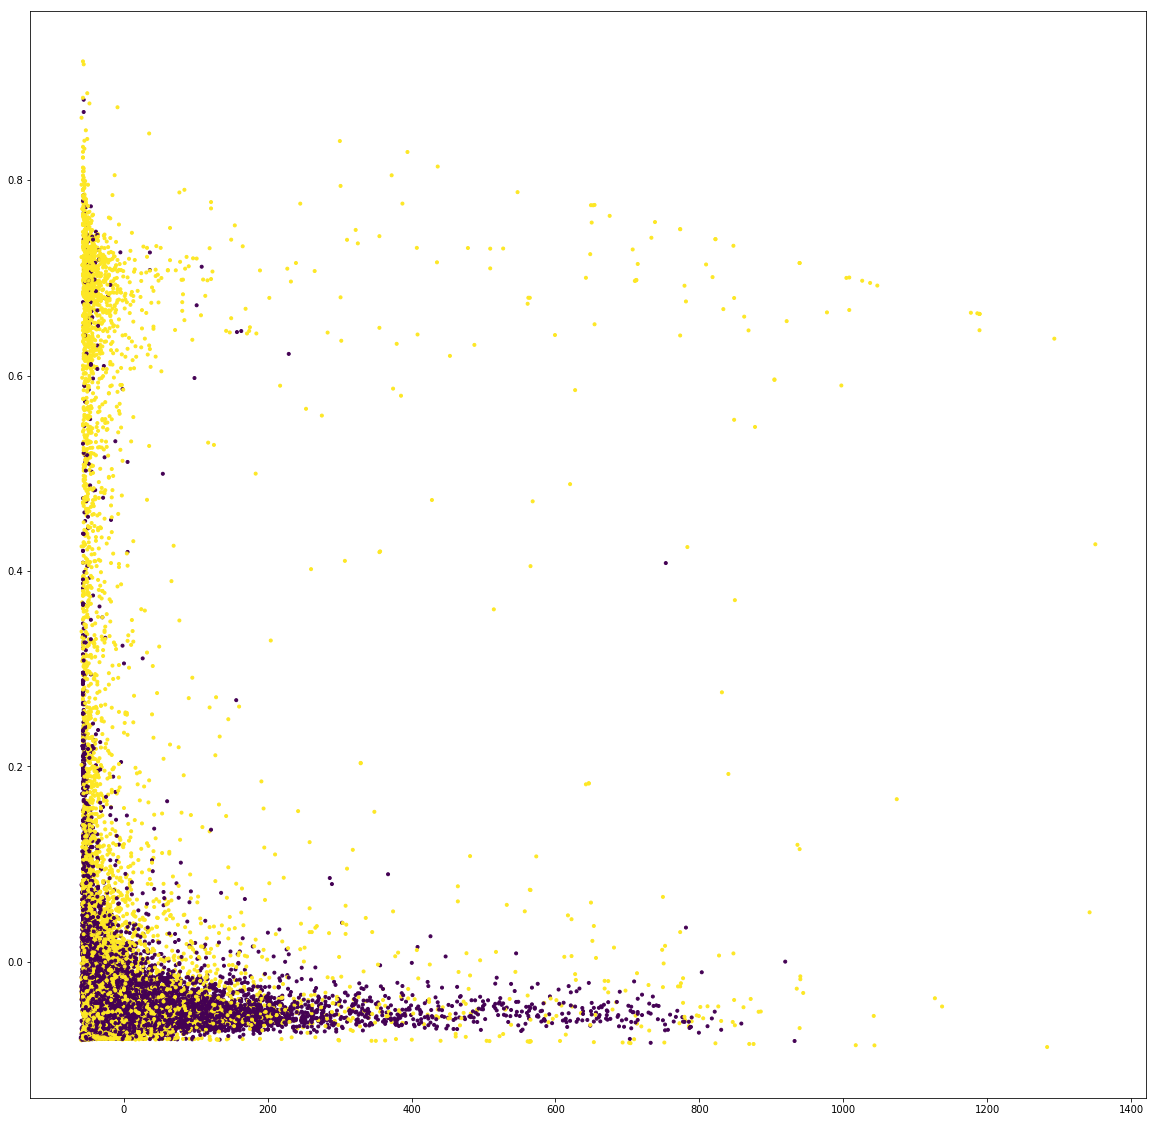

In [48]:
plt.figure(figsize=(20,20))
plt.scatter(vis.T[0],vis.T[1],marker='.',c=train['toxic'])

In [49]:
from sklearn.neural_network import MLPClassifier

In [51]:
mlp = MLPClassifier(verbose=1)

In [ ]:
mlp.fit(train[featues])